In [90]:
DATA_DIR = '../data'
MODEL_DIR = '../models'

In [91]:
import os

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
sns.set_palette('colorblind')

In [92]:
with open(os.path.join(DATA_DIR, 'marketing_campaign.xls'), 'rb') as f:
    df = pd.read_csv(f, sep='\t')
with open(os.path.join(MODEL_DIR, 'kmeans.pickle'), 'rb') as f:
    kmeans = pickle.load(f)
with open(os.path.join(MODEL_DIR, 'pca.pickle'), 'rb') as f:
    pca = pickle.load(f)
with open(os.path.join(MODEL_DIR, 'scaler.pickle'), 'rb') as f:
    scaler = pickle.load(f)

In [93]:
df.select_dtypes(include=['int64'])

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,1,46,709,43,182,42,118,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,2,1,56,406,0,30,0,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,0,0,91,908,48,217,32,12,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,0,1,8,428,30,214,80,30,...,3,0,0,0,0,0,0,3,11,0


In [94]:
kmeans.cluster_centers_

array([[ 0.55506172,  1.57769284, -0.43994857,  0.24545368, -0.03759226,
        -0.00316288, -0.03067423,  0.07579295, -0.15115603,  0.00913644,
        -0.09387652,  0.00628706,  0.02278209, -0.01515392,  0.08425528,
        -0.07360479,  0.23167718, -0.12055999,  0.02147164, -0.0897587 ,
        -0.223678  ,  0.04788353, -0.00874563,  0.08158626,  0.04234266,
         0.00772112,  0.09292401, -0.03213083, -0.04360191, -0.06314277],
       [ 3.54211984, -0.8669425 ,  0.12535599, -0.16878976,  0.01436893,
        -0.07006882,  0.00747742, -0.06495365,  0.0286731 ,  0.01129345,
         0.00650322, -0.01917777,  0.0285725 , -0.00295916, -0.0469951 ,
         0.06724515, -0.15058227,  0.05879026,  0.00492903,  0.01636615,
         0.16350649,  0.01774457, -0.01934036, -0.02782292, -0.06532359,
         0.04015464, -0.04683503,  0.02058084,  0.02001235,  0.04093357],
       [-2.23240637, -0.5007798 ,  0.20185685, -0.05978425,  0.0152931 ,
         0.03938345,  0.01474881, -0.0116013 ,  0

In [95]:
X = np.load(os.path.join(DATA_DIR, 'X_pca.npy'))

In [96]:
y_pred = kmeans.predict(X)
df['label'] = y_pred

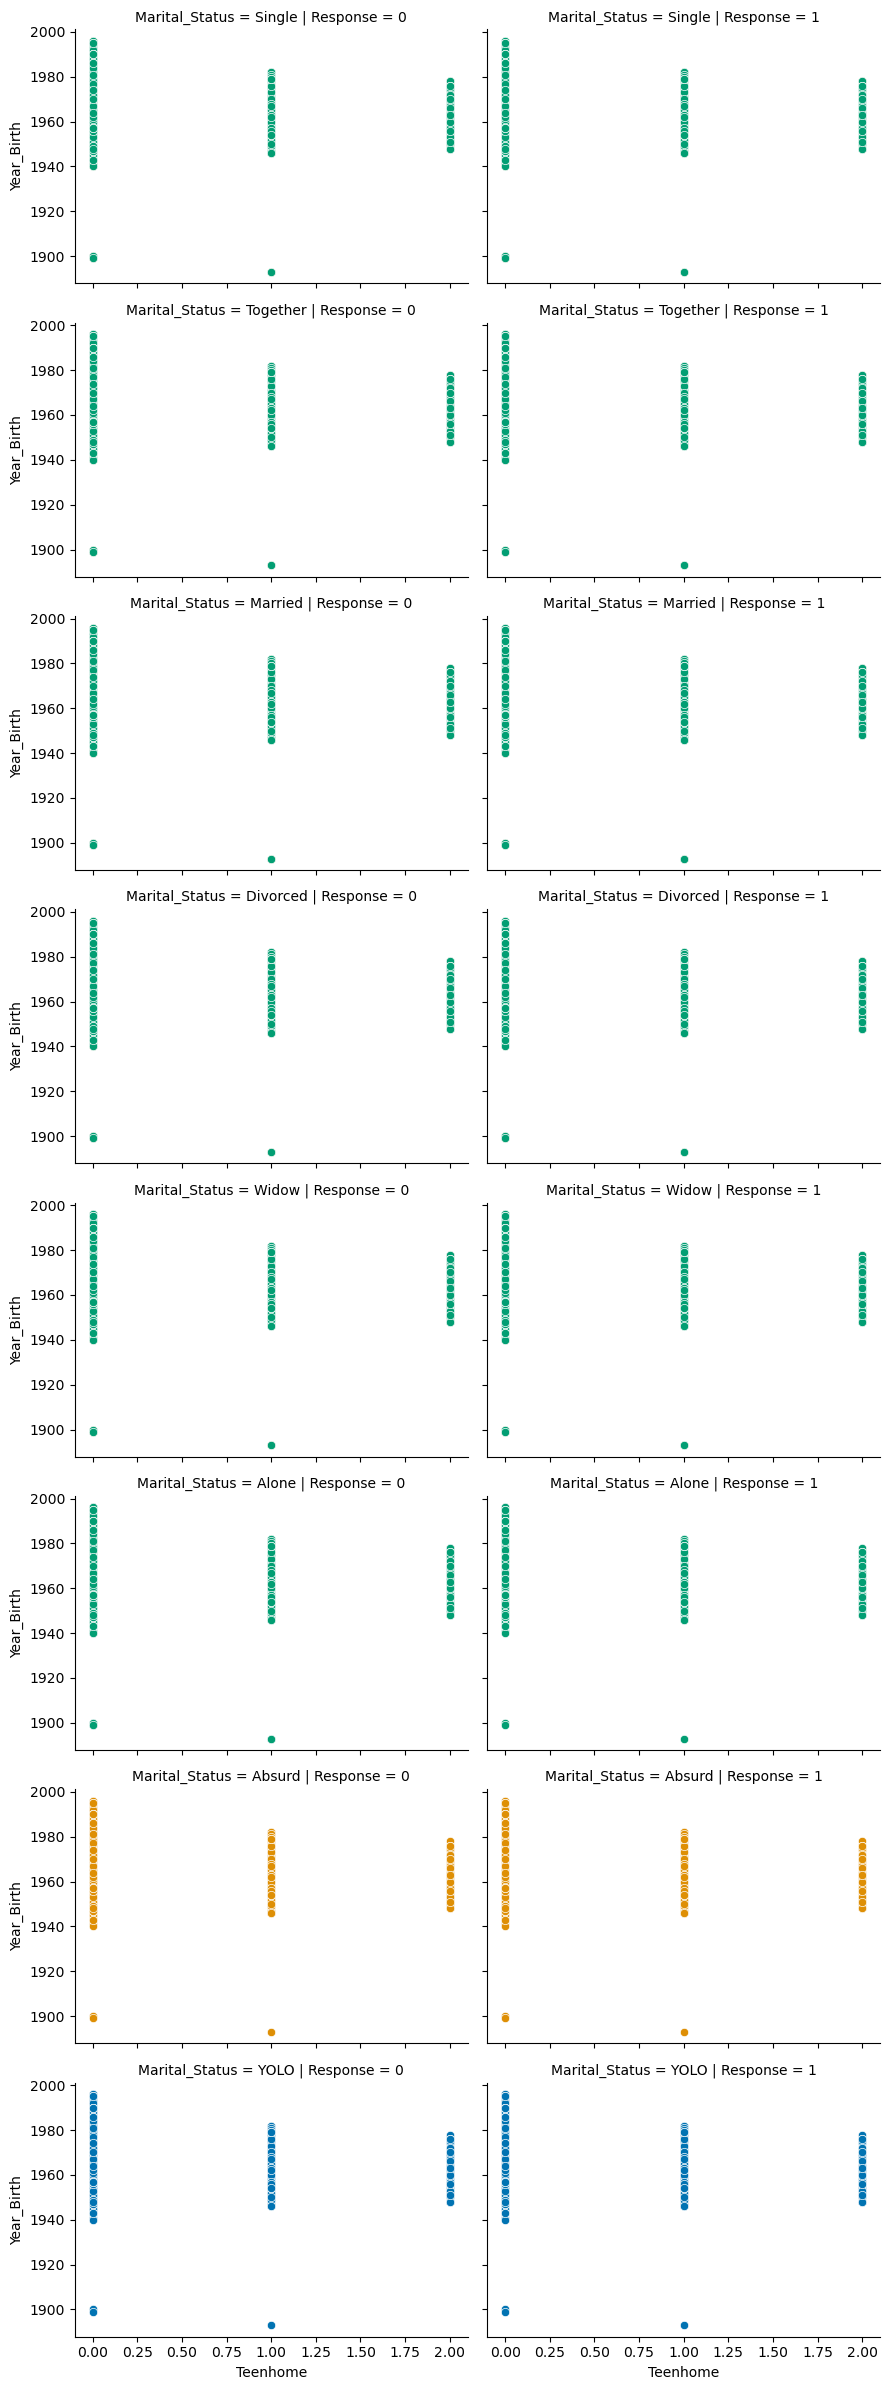

In [102]:
fc = sns.FacetGrid(data=df, hue='label', row='Marital_Status', col='Response', aspect=1.5)
gs = fc.map(sns.scatterplot, x=df['Teenhome'], y=df['Year_Birth'])

<AxesSubplot: xlabel='label', ylabel='count'>

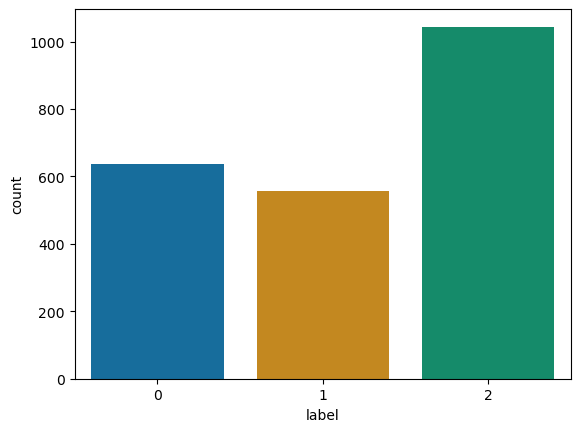

In [98]:
sns.countplot(data=df, x='label')